# Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

In [87]:
#Main libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm
%matplotlib inline 

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Ironhack\Labs\lab-eda-bivariate\amz_uk_price_prediction_dataset.csv")

### Part 1: Analyzing Best-Seller Trends Across Product Categories

In [6]:
df.shape

(2443651, 9)

In [8]:
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
# crosstab category and isBestSeller
crosstab_result = pd.crosstab(df["category"], df["isBestSeller"])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [12]:
#Creating a copy just not to work directly in crosstab_result dataframe
crosstab_Bseller = crosstab_result.copy()

#The columns of the copied df must be properly defined
crosstab_Bseller.columns = ['False', 'True']

In [14]:
#Creating a third column which presents the relative proportion of bestseller products within each category
crosstab_Bseller["Bseller_Proportion"] = crosstab_Bseller["True"]/(crosstab_Bseller["False"]  + crosstab_Bseller['True'])

In [16]:
#Sorting the relative frequencies by ascending order
crosstab_Bseller = crosstab_Bseller.sort_values(by="Bseller_Proportion", ascending = False)
crosstab_Bseller

,False,True,Bseller_Proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


###### From the frequency results, Grocery category highlights as the one with the highest proportion of bestsellers products out of the total products sold (5,8%)

In [19]:
#Chi square test
chi2_stat, p_value, _, _ = chi2_contingency(crosstab_result)
print("p-value:", p_value)

p-value: 0.0


###### With the Chi square p-value we are evaluating whether we can or not reject the null hypothesis which states that product category and bestseller status are independent variables. 
###### Given the 0.0 p-value we can reject the null hypothesis, suggesting that there is a significant association between the two variables.

In [22]:
#Cramer method
association(crosstab_result, method="cramer")

0.1222829439760564

In [24]:
#getting five random categories from the df
Sample5 = crosstab_result.sample(5)

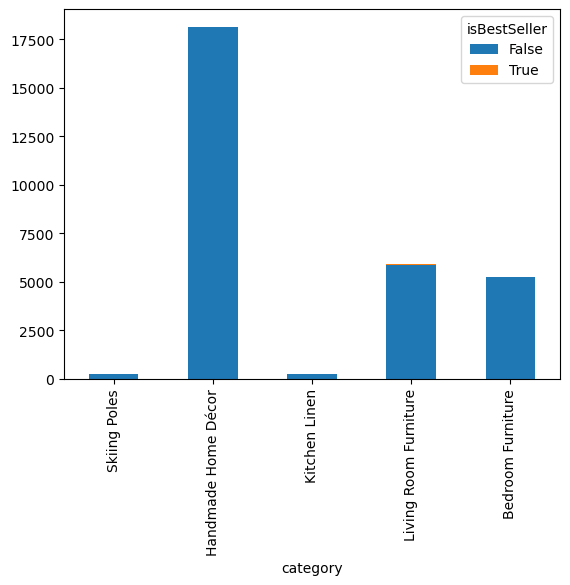

In [26]:
Sample5.plot(kind="bar", stacked=True)
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [29]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    df_new = df[(data >= lower_bound) & (data <= upper_bound)]
       
    return df_new

In [31]:
df_new = tukeys_test_outliers(df["price"])
df_new.shape

(2115963, 9)

In [33]:
df_category = df_new.category.value_counts().reset_index()
top20_category = df_category[:20]
top20_category

,category,count
0,Sports & Outdoors,694092
1,Beauty,19233
2,Bath & Body,19050
3,Manicure & Pedicure Products,18904
4,"Handmade Clothing, Shoes & Accessories",18811
5,Make-up,18718
6,Skin Care,18686
7,Hair Care,18625
8,Birthday Gifts,18398
9,Handmade Gifts,17948


In [107]:
#Instead of 20, we will present the top 10 to obtain better visualizations
top10_category = df_category[:10]

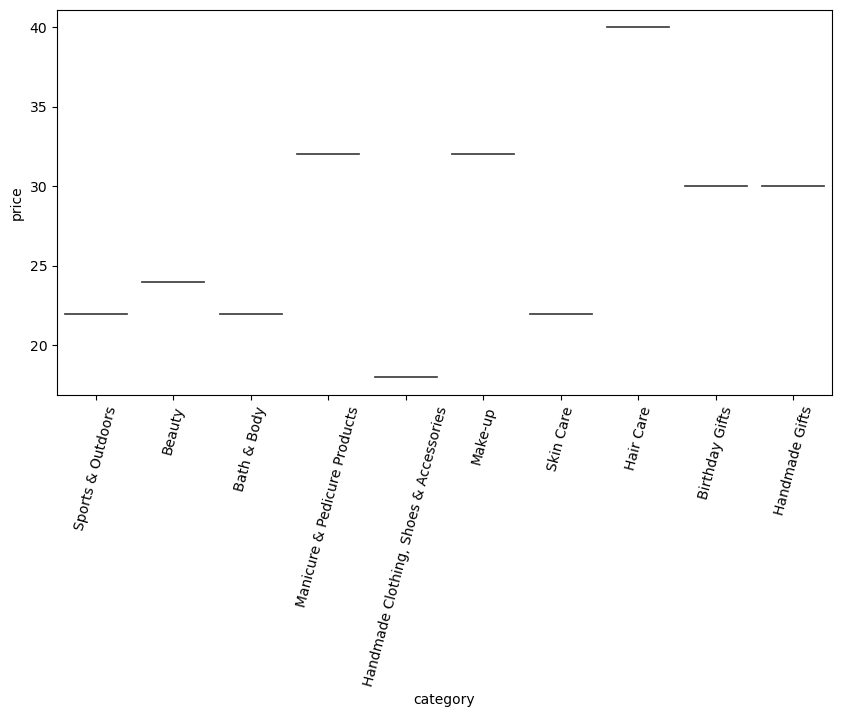

In [105]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=top10_category["category"], y=df["price"])
plt.xticks(rotation=75)
plt.show()

In [37]:
median_prices = df_new.groupby("category")["price"].median().reset_index()
median_prices.rename(columns={"price":"median_price"}, inplace=True)
median_prices = median_prices.sort_values(by="median_price", ascending=False)
median_prices

,category,median_price
75,Desktop PCs,74.00
34,Boxing Shoes,69.79
274,Tablets,69.00
108,Graphics Cards,68.54
190,Motherboards,67.92
...,...,...
4,Adapters,7.05
176,Make-up,7.00
246,Signs & Plaques,6.99
8,Arts & Crafts,5.99


###### Desktop PCs category tends to have the highest median price.

In [42]:
average_prices = df_new.groupby("category")["price"].mean().reset_index()
average_prices.rename(columns={"price":"average_price"}, inplace=True)
average_prices

,category,average_price
0,3D Printers,55.739722
1,3D Printing & Scanning,35.623904
2,Abrasive & Finishing Products,14.427611
3,Action Cameras,38.936875
4,Adapters,8.750197
...,...,...
291,Wind Instruments,18.935339
292,Window Treatments,19.870633
293,Women,20.408735
294,Women's Sports & Outdoor Shoes,49.425894


In [44]:
merged_category = pd.merge(top10_category, average_prices, on='category')
merged_category = merged_category.drop(columns={"count"})
merged_category

,category,average_price
0,Sports & Outdoors,25.172065
1,Beauty,12.523480
2,Bath & Body,14.678683
3,Manicure & Pedicure Products,10.231825
4,"Handmade Clothing, Shoes & Accessories",12.958639
5,Make-up,10.612918
6,Skin Care,15.654722
7,Hair Care,13.461408
8,Birthday Gifts,18.600195
9,Handmade Gifts,17.395112


C:\Users\HP\AppData\Local\Temp\ipykernel_13564\3010391326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_category, x="category", y="average_price", palette="coolwarm")


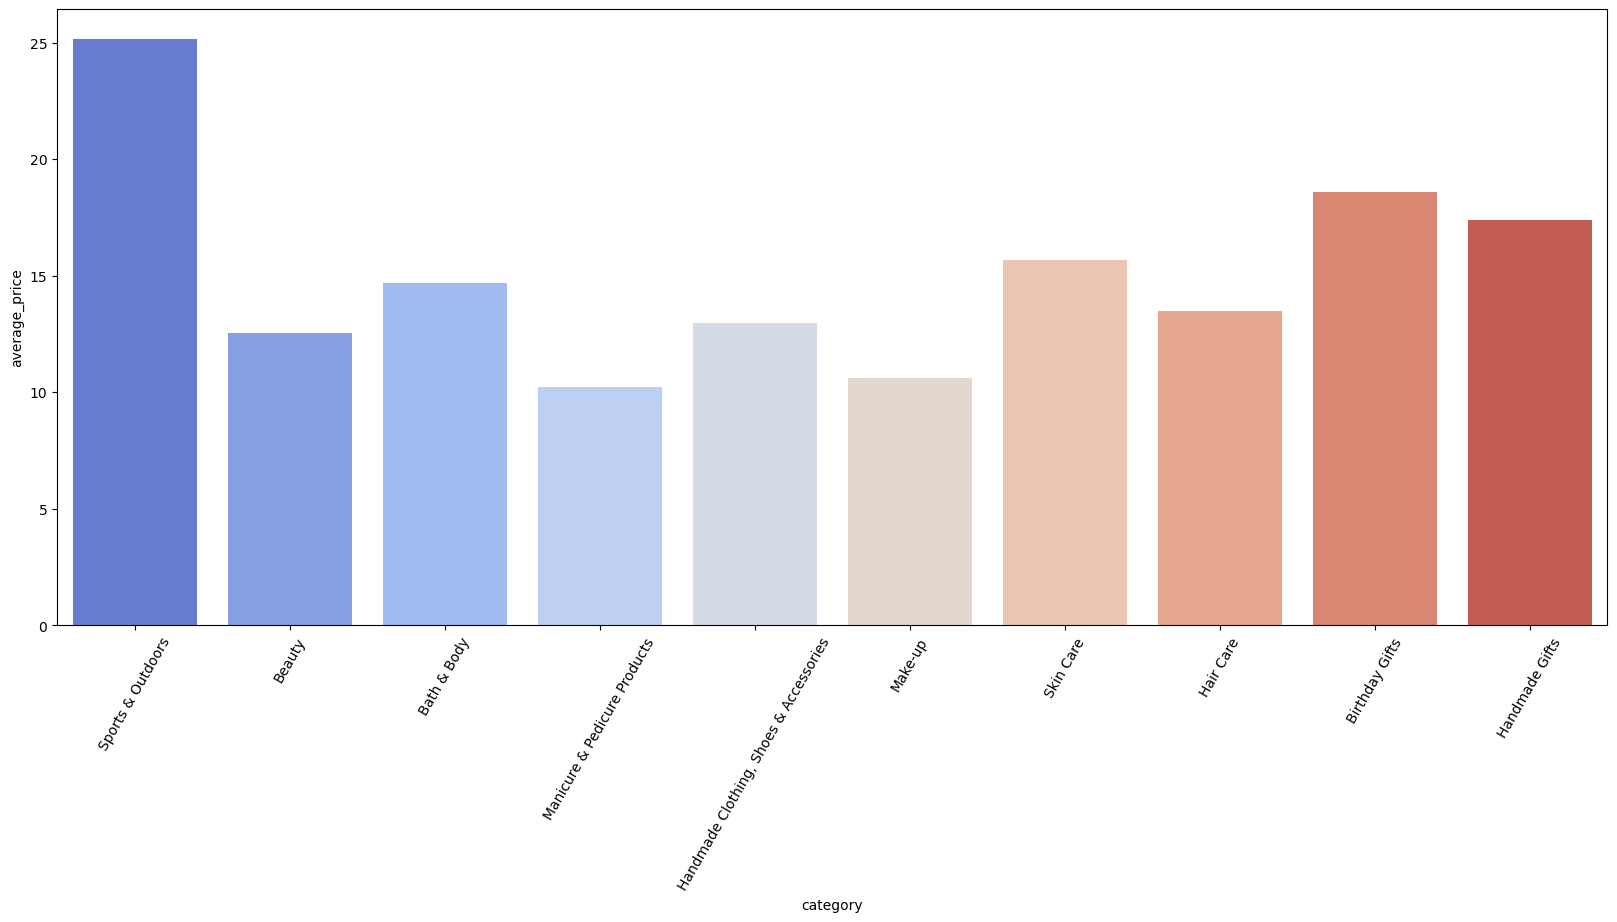

In [46]:
plt.figure(figsize=(20, 8))

sns.barplot(data=merged_category, x="category", y="average_price", palette="coolwarm")
plt.xticks(rotation=60)
plt.show()

In [48]:
average_prices = average_prices.sort_values(by="average_price", ascending=False)
average_prices

,category,average_price
190,Motherboards,68.772432
34,Boxing Shoes,67.417803
75,Desktop PCs,66.915562
274,Tablets,66.552971
108,Graphics Cards,65.103509
...,...,...
22,Bedding Accessories,8.835220
4,Adapters,8.750197
246,Signs & Plaques,8.210513
8,Arts & Crafts,8.006540


###### Laptop category has the highest average price.

In [51]:
df2 = df_new.copy()

In [53]:
df2 = df2[df2["stars"]!= 0.0]

In [55]:
df_10_category=df2[df2["category"].isin(top10_category["category"])]

C:\Users\HP\AppData\Local\Temp\ipykernel_13564\3236819342.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_10_category, x="category", y="stars", palette="coolwarm")


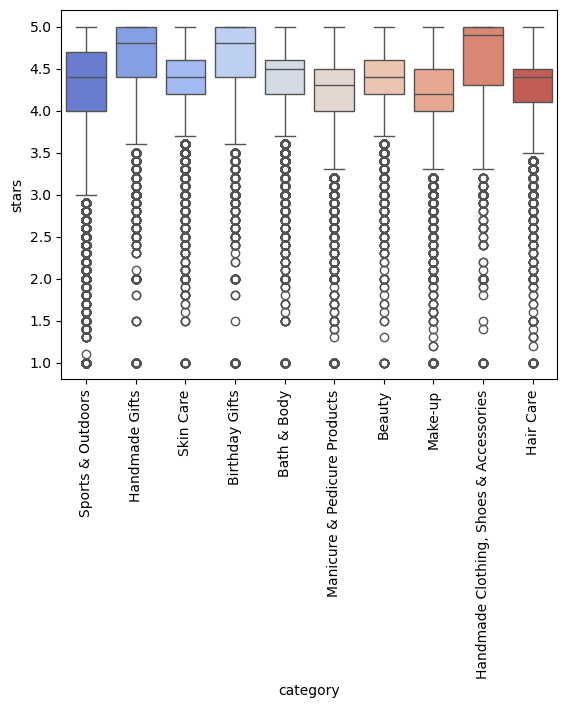

In [57]:
sns.boxplot(data=df_10_category, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [59]:
average_rating = df2.groupby("category")["stars"].median().reset_index()
average_rating.rename(columns={"stars":"median_rating"}, inplace=True)
average_rating.sort_values(by="median_rating",ascending=False)

,category,median_rating
175,Made in Italy Handmade,5.0
115,Handmade Baby Products,5.0
114,Handmade Artwork,5.0
121,Handmade Kitchen & Dining,4.9
116,"Handmade Clothing, Shoes & Accessories",4.9
...,...,...
187,Mobile Phones & Smartphones,3.9
180,Media Streaming Devices,3.8
3,Action Cameras,3.8
42,Camcorders,3.8


###### Made in Italy Handmade category has the highest median rating.

### Part 3: Investigating the Interplay Between Product Prices and Ratings

In [65]:
#Pearson correlation
df["price"].corr(df["stars"])

-0.1249067326214861

In [67]:
#Spearman correlation
df["price"].corr(df["stars"], method="spearman")

-0.1331642546243379

###### Given both Pearson and Spearman values we can not infer that there is a significant correlation between product price and its rating.

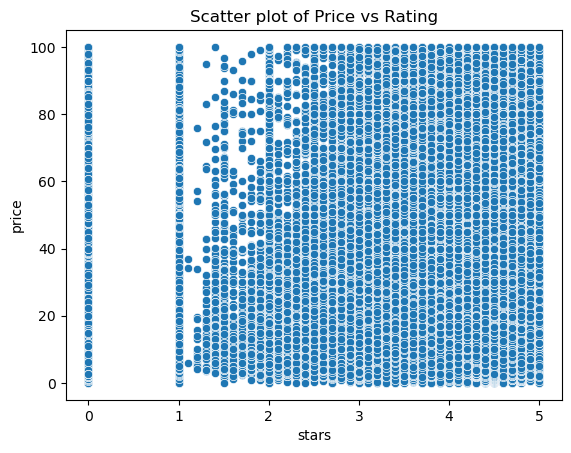

In [70]:
# Plotting a scatter plot to visualize the relationship between 'price' and 'stars'
sns.scatterplot(data=df_new, x='stars', y='price')
plt.title("Scatter plot of Price vs Rating")
plt.show()

###### One can state that the product rating is widely spread across all the range and that it presents no correlation with its prices.

In [73]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [77]:
#Defining new dataframe with only numerical variables
df_num = df.drop(columns=["uid"],inplace =True)
df_num = df.select_dtypes(include="number")
df_num.head()

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0


In [79]:
correlation_matrix = df_num.corr()

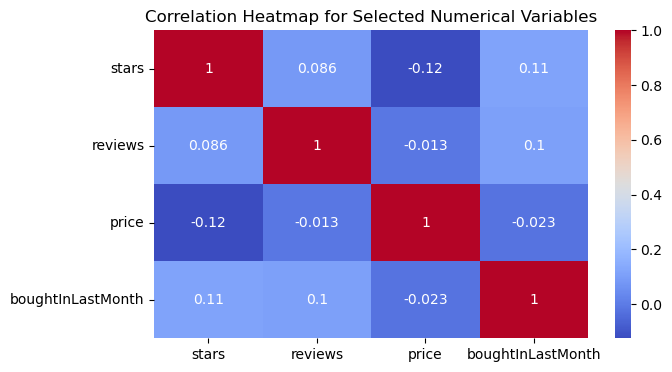

In [85]:
plt.figure(figsize=(7, 4))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

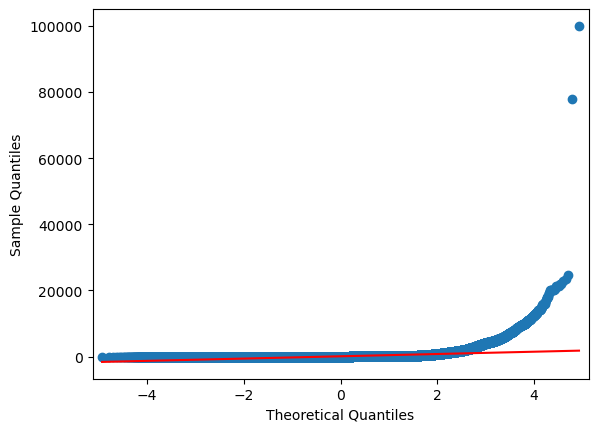

In [89]:
# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');
plt.show()